In [114]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from pylab import *

In [115]:
# Препроцессинг - 0 заменяем 0.000001
def ch(x):
    if x == 0:
        x = 0.000001
    return x

preprop = np.vectorize(ch)

In [116]:
all_data = pd.read_csv('Weibull.csv', header = None)
all_data = pd.DataFrame(preprop(all_data))
all_data.columns = ['y']

In [117]:
def foo_best(data):
    gamma = 0.01
    n = len(data)
    max_foo = -10000
    data = data.values[:, 0]

    # Проход с шагом 0.01 в логарифмической шкале
    bins = np.linspace(-2, 2, 4000)
    for i in bins:
        # Чтобы влезло в тип, берем логарифм от функции правдоподобия
        tmp = (n * np.log(10 ** i) + (((10 ** i)-1) * (sum(np.log(data)))) - sum(data ** (10 ** i)))
        if tmp >= max_foo:
            gamma = i
            max_foo = tmp
    return 10 ** gamma

In [118]:
365 * 4

1460

In [119]:
# На первых 4 годах
foo_best(all_data[:1460])

0.43391968475930792

In [120]:
# На всей выборке
foo_best(all_data)

0.43292144790621601

Populating the interactive namespace from numpy and matplotlib


/home/fartuk/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['power', 'linalg', 'draw_if_interactive', 'random', 'fft', 'info']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


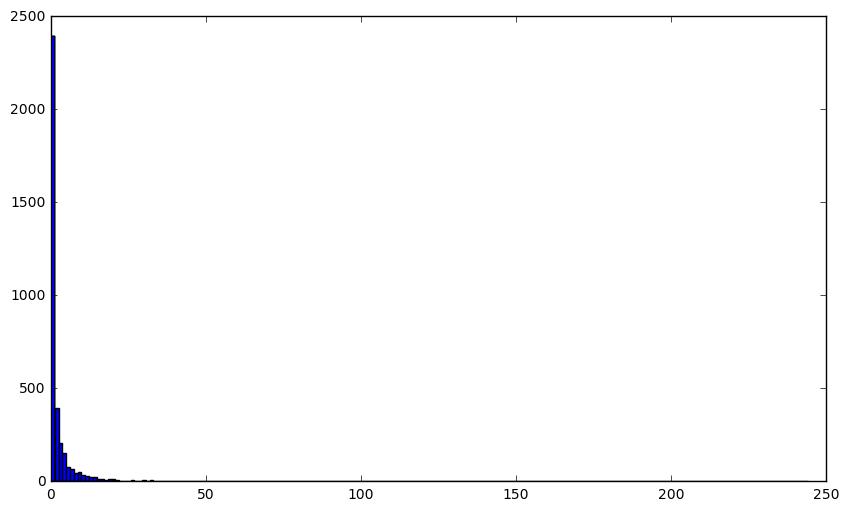

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
pylab.figure(figsize=(10, 6))
plt.hist(all_data.y, bins=200)
plt.show()

# Вывод

Параметры, полученные по первым 4 годам и по всей выборке отличаются не более, чем на 0.2%